# Analyzing this dataset to understand how the NYC Subway ridership varies with various features present in the dataset


In [2]:
#First, loading csv file into Pandas dataframe
import pandas as pd;
data = pd.read_csv('turnstile_weather_v2.csv');

In [9]:
#Getting a general sense of the data
data.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0,0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0,0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0,0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0,0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0,0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0,30.258,55.98,7.86,40.700348,-73.887177


In [10]:
data.shape

(42649, 27)

# Performing Statistical Analysis

In [74]:
#Column 'rain' is a dummy variable, 0 indicates no rain and 1 indicates rain. So, we can use this information to find out how
#ridership varies with Rain. 
# Hence we split the data according to rain variable
rainy_days = data[data['rain']==1]
non_rainy = data[data['rain']==0]

# then, finding the average no. of hourly entries for rainy and non rainy

entries_rain = rainy_days['ENTRIESn_hourly']
entries_non_rain = non_rainy['ENTRIESn_hourly']
print "Average Hourly Entries on a Rainy Day :" , entries_rain.mean()
print "Average Hourly Entries on a Non-Rainy Day :" , entries_non_rain.mean()

Average Hourly Entries on a Rainy Day : 2028.19603547
Average Hourly Entries on a Non-Rainy Day : 1845.53943866


In [65]:
#We can see from the above data that Ridership increases when it rains 
#We can also hypothesis this to verify and test it using Welch's T test 
# Null Hypothesis : No. of entries on both days (rainy & non rainy) are the same
# Alternate Hypothesis : No. of entries on both days (rainy & non rainy) differ

import scipy.stats;
t , p = scipy.stats.ttest_ind(entries_rain,entries_non_rain, equal_var=False)
print t,p

5.04288274762 4.64140243163e-07


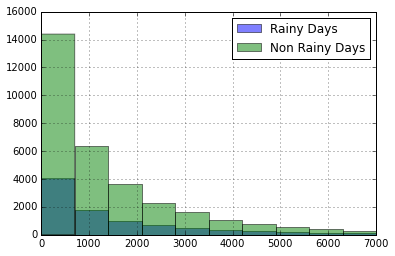

In [59]:
#We can see from the above resuls p-value for the t test < 0.05 , hence we can reject the null and say that the Subway ridership 
# differs on a Rainy day v/s Non-rainy day
# We can also check the plot of Ridership on a Rainy Day v/s Non-rainy day

%matplotlib inline
import matplotlib.pyplot as plt;


entries_rain.hist(range=[0,7000],alpha=0.5, label='Rainy Days')
entries_non_rain.hist(range=[0,7000],alpha=0.5 , label='Non Rainy Days')
plt.legend(loc='upper right')



In [63]:
#Similarly we can analyze how the subway ridership varies on a weekday v/s a weekend 
#Column 'weekday' is a dummy variabl 1 indicates it is a weekday and 0 weekend
#Splitting the data according to weekdays and weekends

week_days = data[data['weekday']==1]
week_ends = data[data['weekday']==0]

week_day_entries = week_days['ENTRIESn_hourly']
week_ends_entries = week_ends['ENTRIESn_hourly']
print "Average Hourly Entries on a Weekday:" , week_day_entries.mean()
print "Average Hourly Entries on a Weekend:" , week_ends_entries.mean()


Average Hourly Entries on a Weekday: 2158.04273055
Average Hourly Entries on a Weekend: 1207.45652352


In [67]:
#As expected, it can see from the above results that on an average Ridership is high on a weekday compared to a weekend
#We can also hypothesis this to verify and test it using Welch's T test  
# Null Hypothesis : No. of entries on both Weekdays & Weekends are the same
# Alternate Hypothesis : No. of entries on both Weekdays & Weekends differ

t , p = scipy.stats.ttest_ind(week_day_entries,week_ends_entries, equal_var=True)
print t , p


30.3558862665 2.87197197555e-200


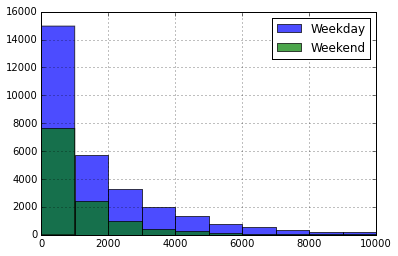

In [77]:
#We can see from the above resuls p-value for the t test < 0.05 , hence we can reject the null and say that the Subway ridership 
# differs on Weekday v/s Weekend
# We can also check the plot of Ridership on a Weekday v/s Weekend

week_day_entries.hist(range=[0,10000], alpha=0.7 , label = 'Weekday')
week_ends_entries.hist(range=[0,10000] , alpha=0.7 , label = 'Weekend')
plt.legend(loc='upper right')

#Analyzing NYC subway data in order to build predictive models to estimate/predict Ridership (Number of Entries) taking into account various features/variables

In [96]:
#Creating correlation matrix; checking which variables are highly correlated with ENTRIESn_hourly
correlation = data.corr()
print correlation

                 ENTRIESn    EXITSn  ENTRIESn_hourly  EXITSn_hourly      hour  \
ENTRIESn         1.000000  0.924739         0.585895       0.530925 -0.005358   
EXITSn           0.924739  1.000000         0.552648       0.582130 -0.005421   
ENTRIESn_hourly  0.585895  0.552648         1.000000       0.640267  0.286798   
EXITSn_hourly    0.530925  0.582130         0.640267       1.000000  0.252758   
hour            -0.005358 -0.005421         0.286798       0.252758  1.000000   
day_week        -0.001476 -0.002259        -0.094897      -0.080410  0.006010   
weekday         -0.002457 -0.002270         0.145431       0.125729 -0.005271   
latitude         0.126110  0.072566         0.115635       0.091075 -0.000904   
longitude       -0.207909 -0.237180        -0.124047      -0.134714  0.001106   
fog             -0.010882 -0.010703        -0.008590      -0.009003  0.038454   
precipi          0.011409  0.013877        -0.027682      -0.027940 -0.081902   
pressurei       -0.003690 -0

#Linear Regression using sklearn

In [109]:
#Now building Linear Regression models to predict hourly entries at a Subway station
from sklearn.linear_model import LinearRegression

#Splitting data into Target and Feature variables
#Selecting just 4 variables as features
features = ['rain','hour','precipi','meantempi']
target = data['ENTRIESn_hourly']
features_data = data[features]

In [110]:
#splitting dataset into testing and training datasets
from sklearn.cross_validation import train_test_split
target_train,target_test,features_train,features_test = train_test_split(target,features_data, test_size=0.3)

In [111]:
reg = LinearRegression()
reg.fit(features_train,target_train)
print "R squared :" , reg.score(features_test,target_test)
print "Intercept :" , reg.intercept_
coef= zip(features,reg.coef_)
print coef

R squared : 0.0794145237657
Intercept : 1228.58004664
[('rain', 157.60990317420755), ('hour', 124.01991930337155), ('precipi', -1687.5512227268953), ('meantempi', -9.4482174534366781)]


In [ ]:
#As we can see, R squared achieved of around 8-9%
#Hence we now select variables which are highly correlated to ENTRIESn_hourly and build another linear classifier with 5 
#different features

In [106]:
features = ['weekday','hour','EXITSn_hourly','longitude','latitude']
target = data['ENTRIESn_hourly']
features_data = data[features]
target_train,target_test,features_train,features_test = train_test_split(target,features_data, test_size=0.3)
reg = LinearRegression()
reg.fit(features_train,target_train)
print "R squared :" , reg.score(features_test,target_test)
print "Intercept :" , reg.intercept_
coef= zip(features,reg.coef_)
print coef

R squared : 0.437396991044
Intercept : -328083.565741
[('weekday', 480.57112625819144), ('hour', 61.00083344904408), ('EXITSn_hourly', 0.76802718134303172), ('longitude', -2820.0504304802339), ('latitude', 2932.9939161985944)]


In [114]:
#With the above model we can achieve R squared of around 45%
#Trying to improve the model by adding more featues below such as Windspeed, Fog(yes/no), Weather and so on

features = ['weekday','hour','latitude','fog','longitude','wspdi','weather_lat','weather_lon','EXITSn_hourly']
target = data['ENTRIESn_hourly']
features_data = data[features]
target_train,target_test,features_train,features_test = train_test_split(target,features_data, test_size=0.3)
reg = LinearRegression()
reg.fit(features_train,target_train)
print "R squared :" , reg.score(features_test,target_test)
print "Intercept :" , reg.intercept_
coef= zip(features,reg.coef_)
print coef

R squared : 0.432031003645
Intercept : -295303.048377
[('weekday', 484.62978242486895), ('hour', 60.629748340825032), ('latitude', 6248.4889837733854), ('fog', -142.49751345383447), ('longitude', -1945.789774745145), ('wspdi', 0.387859920666904), ('weather_lat', -3818.2934490810912), ('weather_lon', -707.84875515288127), ('EXITSn_hourly', 0.78644896038157808)]


In [115]:
#We can see from the above results that we can achieve R^2 of around 48-50%, however we cannot figure out which variables/features
#are significant and which are not 
#Hence, now implementing Linear Regression classifier using statsmodels OLS 

#Linear Regression using Statsmodels OLS

In [117]:
#Using OLS model below, we get all the coefficients along with their p-values (used to determine significant features)
#and R squared values
import statsmodels.formula.api as smf 
lm = smf.ols(formula='ENTRIESn_hourly ~ rain+precipi+hour+meantempi'  , data= data).fit()
print lm.summary()

                            OLS Regression Results                            
Dep. Variable:        ENTRIESn_hourly   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     971.7
Date:                Fri, 18 Mar 2016   Prob (F-statistic):               0.00
Time:                        01:26:34   Log-Likelihood:            -3.9944e+05
No. Observations:               42649   AIC:                         7.989e+05
Df Residuals:                   42644   BIC:                         7.989e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1213.7333    136.477      8.893      0.0

In [120]:
#Trying another Linear Classifier with few more features 
lm = smf.ols(formula='ENTRIESn_hourly ~ EXITSn_hourly + weekday+ hour+ fog+ latitude+longitude+pressurei+weather_lat', data=data).fit()
print lm.summary()


                            OLS Regression Results                            
Dep. Variable:        ENTRIESn_hourly   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     4167.
Date:                Fri, 18 Mar 2016   Prob (F-statistic):               0.00
Time:                        01:30:13   Log-Likelihood:            -3.8898e+05
No. Observations:               42649   AIC:                         7.780e+05
Df Residuals:                   42640   BIC:                         7.781e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept     -2.815e+05   1.69e+04    -16.694

In [122]:
# Another Linear Regression classifier this time adding a few interation terms. 
#Interaction between number of exits, hour of the day, weekday(yes/no) and also between Latitude of the weather station 
# and longitude of the weather station 
lm = smf.ols(formula='ENTRIESn_hourly ~ EXITSn_hourly*hour* weekday+  weather_lat*weather_lon +wspdi*tempi ', data=data).fit()
print lm.summary()

#We achieve R square of 46.7% in this case 

                            OLS Regression Results                            
Dep. Variable:        ENTRIESn_hourly   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     2871.
Date:                Fri, 18 Mar 2016   Prob (F-statistic):               0.00
Time:                        01:32:26   Log-Likelihood:            -3.8789e+05
No. Observations:               42649   AIC:                         7.758e+05
Df Residuals:                   42635   BIC:                         7.759e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept           

In [124]:
#Now adding on to the existing features, we add UNIT feature, which is the subway station, hence would be a categorical variable
#By adding this categorical variable, we will be able to cover more uncertanity in the Entries because No of Entries at a 
#particular station would vary, hence taking it into account would improve the model

lm = smf.ols(formula='ENTRIESn_hourly ~ EXITSn_hourly*hour* weekday+ latitude*longitude+ wspdi*tempi+UNIT', data=data).fit()
print lm.summary()

#In this case we get an R squared of around 58%

                            OLS Regression Results                            
Dep. Variable:        ENTRIESn_hourly   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     236.0
Date:                Fri, 18 Mar 2016   Prob (F-statistic):               0.00
Time:                        01:36:11   Log-Likelihood:            -3.8275e+05
No. Observations:               42649   AIC:                         7.660e+05
Df Residuals:                   42399   BIC:                         7.682e+05
Df Model:                         249                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept           

#Some Interesting Visualizations 

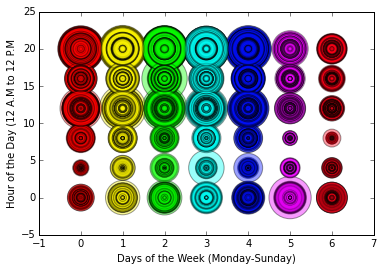

In [134]:
#Creating a scatter plot of Day of the Week v/s hour of the day, and the bubble size indicates the Number of Entries 
#on that particular day at that particular hour

plt.scatter(x=data['day_week'],y=data['hour'] , s=data['ENTRIESn_hourly']/15 , c=data['day_week'],alpha=0.4 ,cmap='hsv' )
plt.xlabel('Days of the Week (Monday-Sunday)')
plt.ylabel('Hour of the Day (12 A.M to 12 P.M')
width = 20
height = 20
plt.figure(figsize=(1,1))

In [135]:
# We can see from the plot, how the ridership on weekdays varies compared to weekends and also how subway ridership varies
# on a particular hour of the day (eg. peak hours v/s non peak hours)

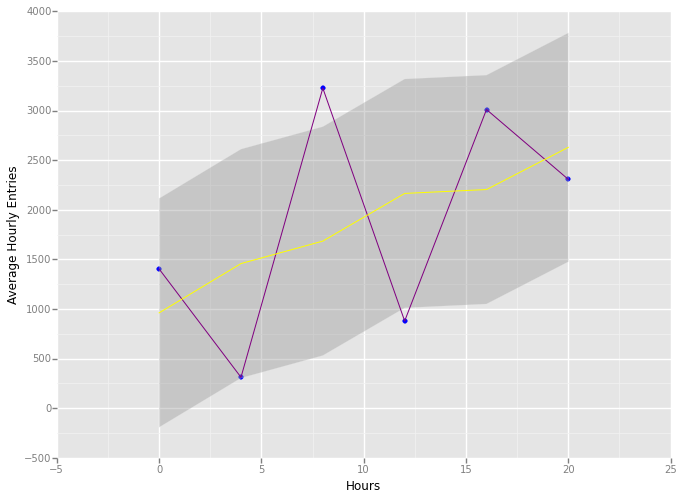

<ggplot: (41341903)>

In [146]:
#Visualization using ggplot 
#This plot shows how entries vary by the hour. We can figure out the peak hours and non-peak hours looking at the plot

avg_entries = data.groupby('hour')['ENTRIESn_hourly'].mean()
hours = data['hour'].unique()
from ggplot import *;
ggplot(aes(x=hours,y=avg_entries),data)+geom_point(color='blue')+geom_line(color='purple')+stat_smooth(color='yellow') \
+xlab('Hours')+ylab('Average Hourly Entries')


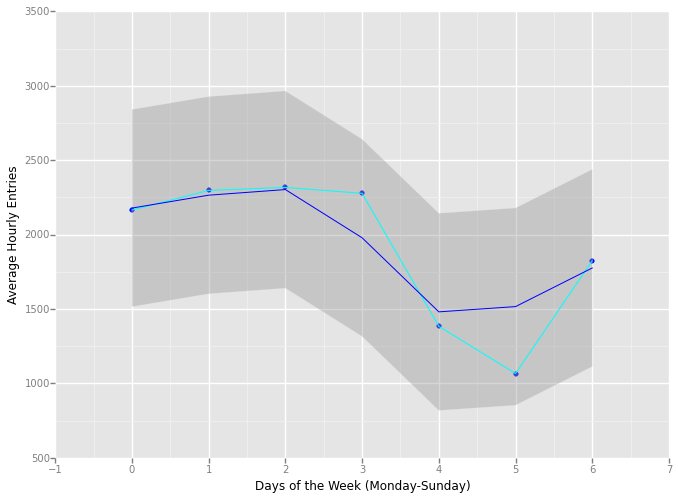

<ggplot: (40586928)>


In [151]:
#This plot shows how entries vary from Monday to Sunday.
# It can be seen from the figure that more people ride the subway on weekdays compared to weekends

lavg_entries2 = data.groupby('day_week')['ENTRIESn_hourly'].mean()
day=data['day_week'].unique()
print ggplot(data, aes(x=day,y=avg_entries2))+geom_point(color='blue')+geom_line(color='aqua')+ \
stat_smooth(color='blue')+xlab('Days of the Week (Monday-Sunday)')+ylab('Average Hourly Entries')